# Librerias

In [34]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math 

## Codigo basura

# Cración de Modelo

In [35]:
loss_tracker = keras.metrics.Mean(name="loss") #El promedio de loss
pi = tf.constant(math.pi)
class Graficador_funcion(Sequential):
    @property
    def metrics(self):
        return [loss_tracker] #igual cambia el loss_tracker

    def train_step(self, data):
        batch_size =100 #Calibra la resolucion de la funcion
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        #Creamos un vector columna con valores random entre -1 a 1
        #Este será el intervalo de nuestra función
        funcion = 3.*tf.math.sin(pi*x)
        #Crea las y's correctas

        #Calculamos el gradiente de loss
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #Dice al modelo que está en modo entrenamiento
            loss = tf.math.reduce_mean(tf.math.square(y_pred-funcion))
            #Error de minimos cuadrados
            #Entre más cerca estén del cero, mejor es nuestro modelo
            # Pues diría que y_pred = funcion

        grads = tape.gradient(loss, self.trainable_weights)
        #Guardamos las derivadas de loss respecto a los pesos
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        #Esto viene de Sequential
            #toma los gradientes calculados durante
            #la retropropagación y los utiliza para
            #actualizar los valores de las variables
            #entrenables del modelo utilizando el
            #algoritmo de optimización especificado por el optimizador.
        #actualiza metricas
        loss_tracker.update_state(loss)

        return {"loss": loss_tracker.result()}

# Entrenamiento

In [36]:
model = Graficador_funcion()
model.add(Dense(600,activation='tanh', input_shape=(1,)))
model.add(Dense(200,activation='tanh'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))
model.summary()

Model: "graficador_funcion_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 600)               1200      
                                                                 
 dense_9 (Dense)             (None, 200)               120200    
                                                                 
 dense_10 (Dense)            (None, 200)               40200     
                                                                 
 dense_11 (Dense)            (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=Adam(learning_rate=0.0001), metrics=['loss'])

In [38]:
x=tf.linspace(-1,1,100)

In [39]:
history = model.fit(x,epochs=1000,verbose=0)

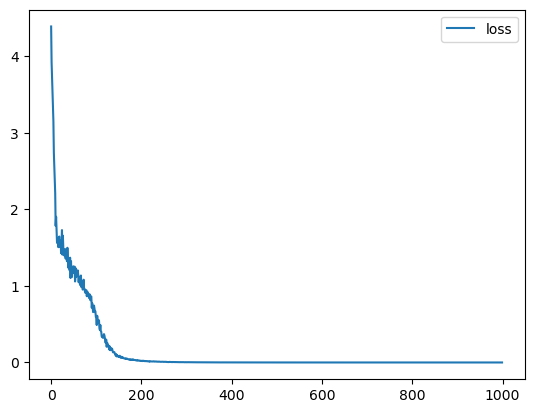

In [40]:
plt.plot(history.history["loss"], label='loss')
plt.legend()
plt.show()

In [41]:
x=tf.linspace(-1,1,100)

In [42]:
y_pred=model.predict(x)

4/4 [==============================] - 0s 6ms/step


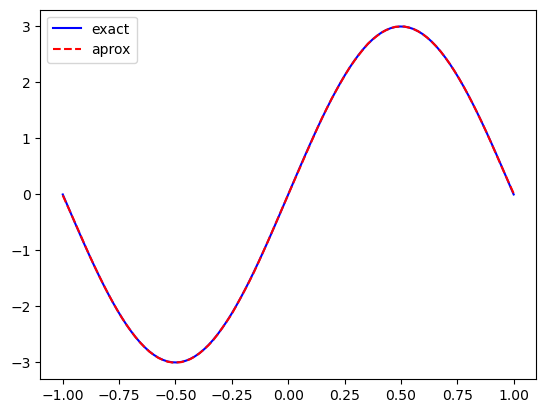

In [43]:
plt.plot(x, 3.*tf.math.sin(math.pi*x), label="exact", color='blue')
plt.plot(x,y_pred,label="aprox", color='red', linestyle='--')
plt.legend()
plt.show()